In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D

### Lorenz attractor - 3D

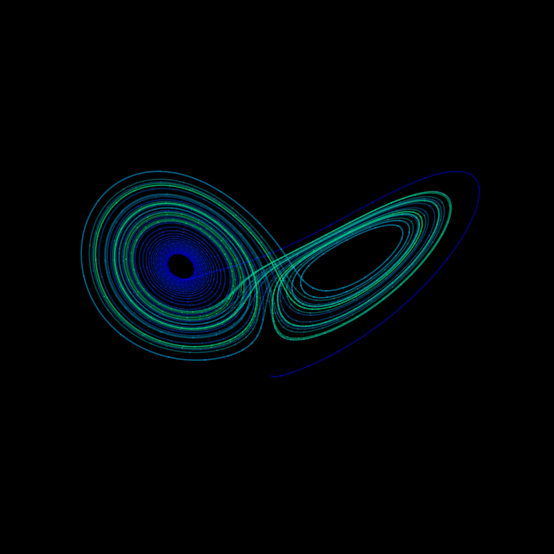

In [3]:
WIDTH, HEIGHT, DPI = 1000, 750, 100

# Lorenz paramters and initial conditions.
sigma, beta, rho = 10, 2.667, 28
u0, v0, w0 = 0, 1, 1.05

# Maximum time point and total number of time points.
tmax, n = 50, 10000

def lorenz(t, X, sigma, beta, rho):
    """The Lorenz equations."""
    u, v, w = X
    up = -sigma*(u - v)
    vp = rho*u - v - u*w
    wp = -beta*w + u*v
    return up, vp, wp

# Integrate the Lorenz equations.
soln = solve_ivp(lorenz, (0, tmax), (u0, v0, w0), args=(sigma, beta, rho),
                 dense_output=True)
# Interpolate solution onto the time grid, t.
t = np.linspace(0, tmax, n)
x, y, z = soln.sol(t)

# Plot the Lorenz attractor using a Matplotlib 3D projection.
fig = plt.figure(facecolor='k', figsize=(WIDTH/DPI, HEIGHT/DPI))
ax = fig.gca(projection='3d')
ax.set_facecolor('k')
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

# Make the line multi-coloured by plotting it in segments of length s which
# change in colour across the whole time series.
s = 10
cmap = plt.cm.winter
for i in range(0,n-s,s):
    ax.plot(x[i:i+s+1], y[i:i+s+1], z[i:i+s+1], color=cmap(i/n), alpha=0.4)

# Remove all the axis clutter, leaving just the curve.
ax.set_axis_off()

plt.savefig('lorenz.png', dpi=DPI)
plt.show()

### Simple version

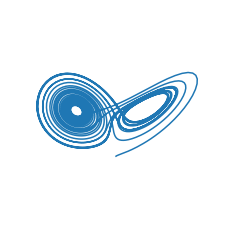

In [3]:
rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0

def f(state, t):
    x, y, z = state  # Unpack the state vector
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # Derivatives

state0 = [1.0, 1.0, 1.0]
t = np.arange(0.0, 40.0, 0.01)

states = odeint(f, state0, t)

fig = plt.figure()
ax = fig.gca(projection="3d")
t_max = 3000
ax.plot(states[0:t_max, 0], states[0:t_max, 1], states[0:t_max, 2],'-')
ax.set_axis_off()
plt.draw()
plt.show()

### Creating dataset

In [ ]:
t_max = 6000
time_step = 0.01
frame_size = 128
frames_per_folder = 6000

folder_name = 'lorenz_frames_gif'

dir_num = -1
t = np.arange(0.0, t_max, time_step)
states = odeint(f, state0, t)

os.mkdir(folder_name)

for i in range(t_max):
    if i%frames_per_folder == 0:
        print('Folder ', round(i/frames_per_folder)+1, '/', round(t_max/frames_per_folder), 'created')
        dir_num += 1
        os.mkdir("./%s" %folder_name + "/" + str(dir_num))
    fig = plt.figure(figsize=(frame_size/100., frame_size/100))
    ax = fig.gca(projection="3d")
    ax.set_axis_off()
    ax.plot(states[i+1:t_max, 0], states[i+1:t_max, 1], states[i+1:t_max, 2], '.', c="white")
    ax.plot(states[0:i-1, 0], states[0:i-1, 1], states[0:i-1, 2], '.', c="white")
    ax.plot(states[i, 0], states[i, 1], states[i, 2], 'o')
    plt.savefig("./%s/%s/%s.png" %(folder_name, str(dir_num), str(i)), dpi = 100)
    plt.close(fig)

### Testing the dataloader

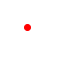

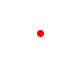

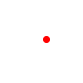

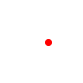

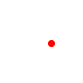

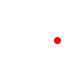

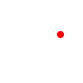

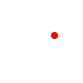

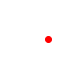

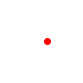

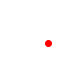

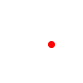

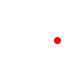

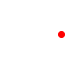

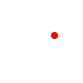

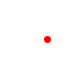

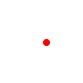

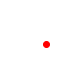

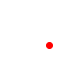

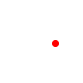

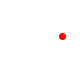

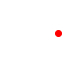

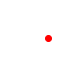

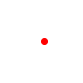

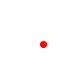

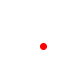

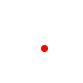

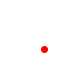

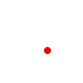

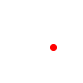

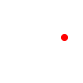

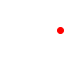

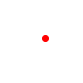

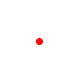

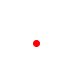

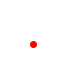

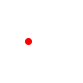

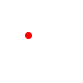

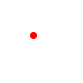

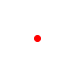

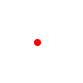

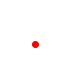

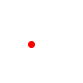

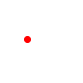

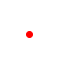

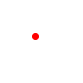

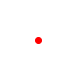

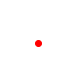

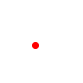

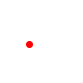

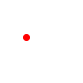

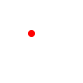

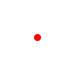

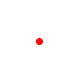

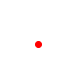

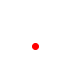

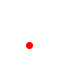

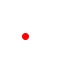

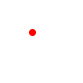

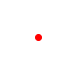

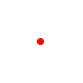

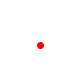

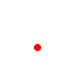

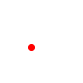

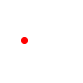

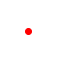

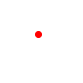

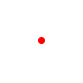

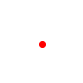

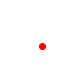

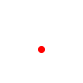

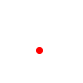

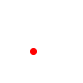

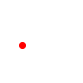

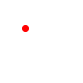

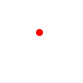

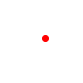

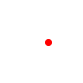

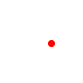

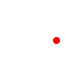

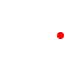

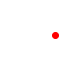

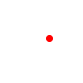

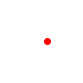

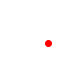

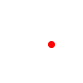

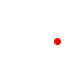

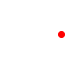

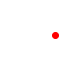

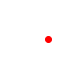

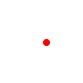

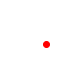

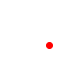

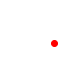

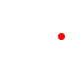

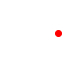

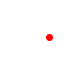

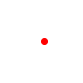

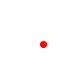

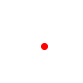

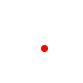

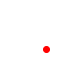

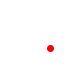

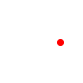

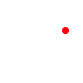

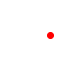

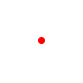

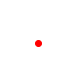

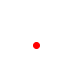

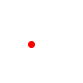

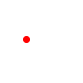

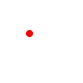

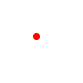

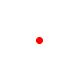

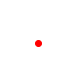

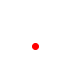

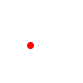

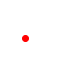

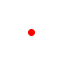

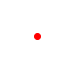

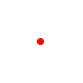

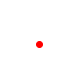

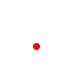

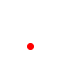

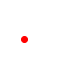

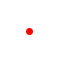

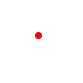

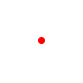

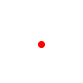

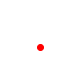

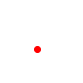

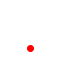

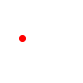

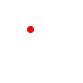

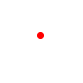

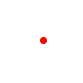

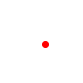

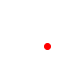

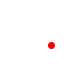

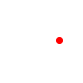

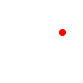

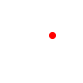

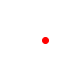

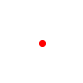

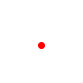

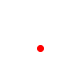

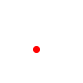

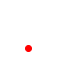

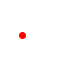

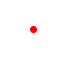

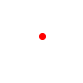

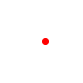

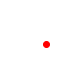

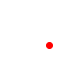

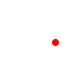

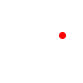

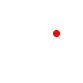

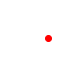

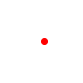

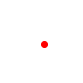

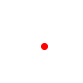

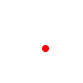

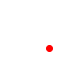

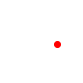

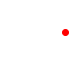

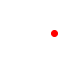

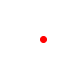

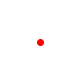

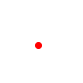

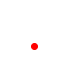

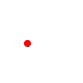

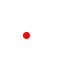

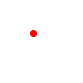

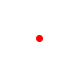

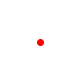

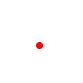

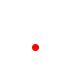

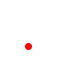

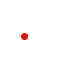

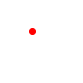

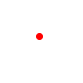

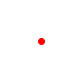

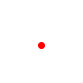

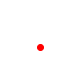

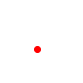

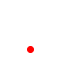

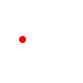

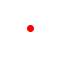

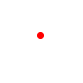

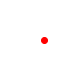

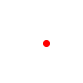

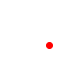

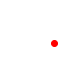

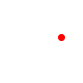

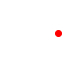

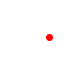

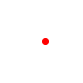

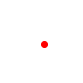

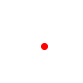

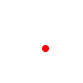

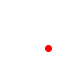

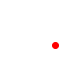

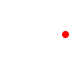

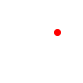

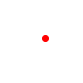

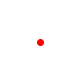

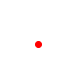

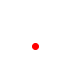

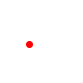

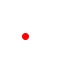

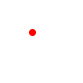

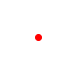

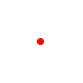

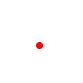

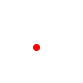

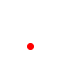

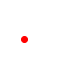

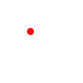

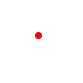

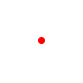

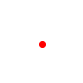

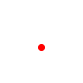

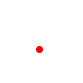

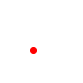

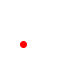

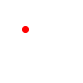

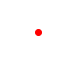

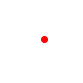

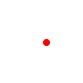

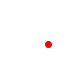

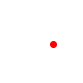

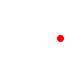

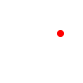

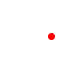

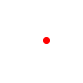

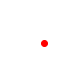

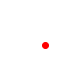

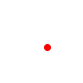

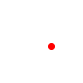

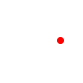

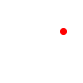

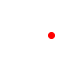

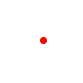

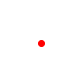

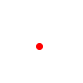

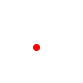

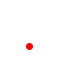

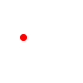

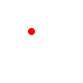

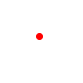

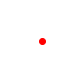

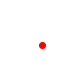

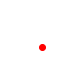

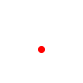

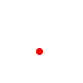

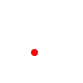

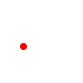

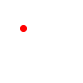

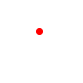

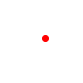

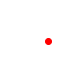

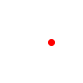

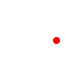

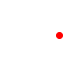

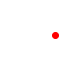

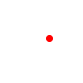

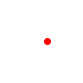

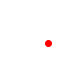

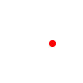

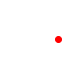

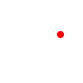

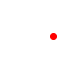

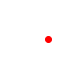

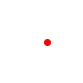

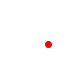

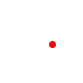

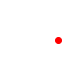

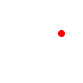

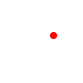

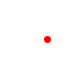

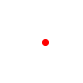

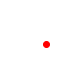

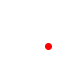

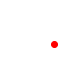

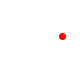

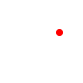

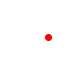

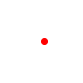

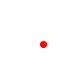

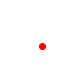

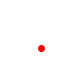

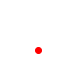

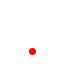

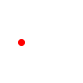

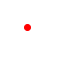

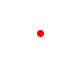

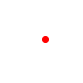

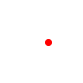

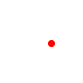

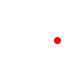

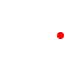

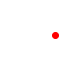

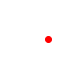

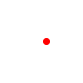

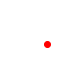

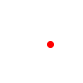

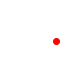

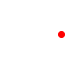

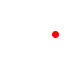

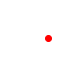

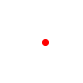

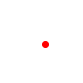

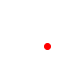

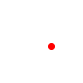

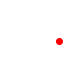

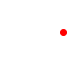

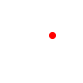

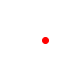

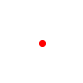

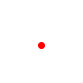

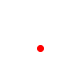

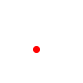

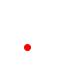

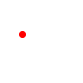

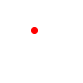

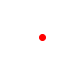

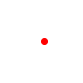

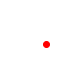

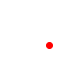

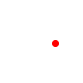

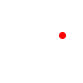

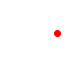

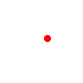

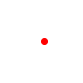

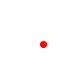

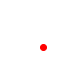

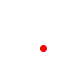

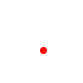

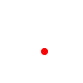

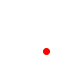

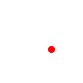

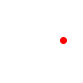

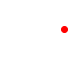

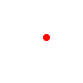

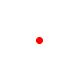

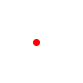

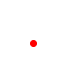

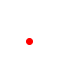

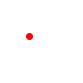

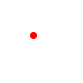

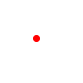

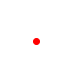

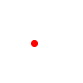

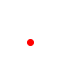

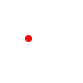

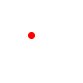

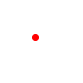

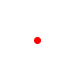

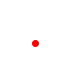

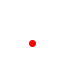

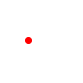

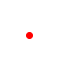

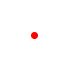

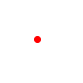

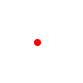

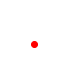

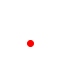

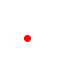

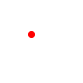

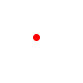

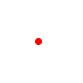

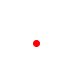

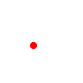

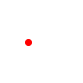

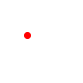

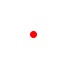

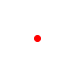

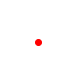

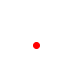

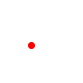

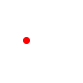

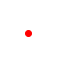

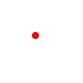

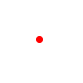

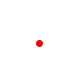

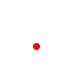

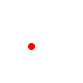

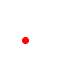

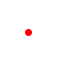

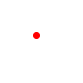

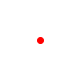

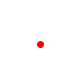

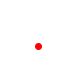

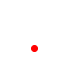

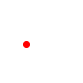

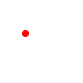

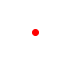

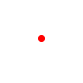

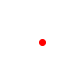

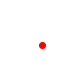

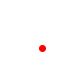

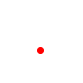

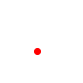

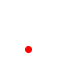

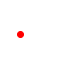

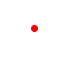

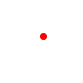

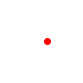

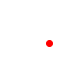

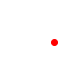

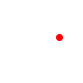

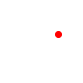

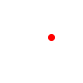

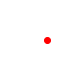

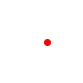

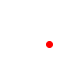

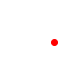

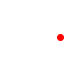

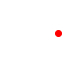

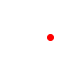

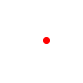

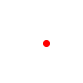

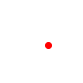

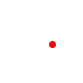

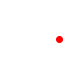

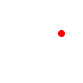

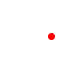

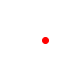

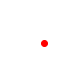

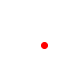

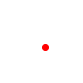

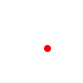

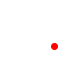

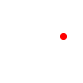

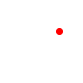

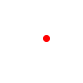

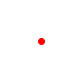

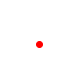

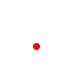

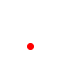

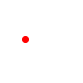

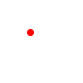

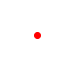

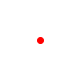

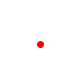

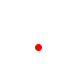

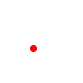

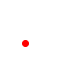

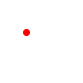

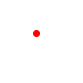

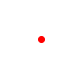

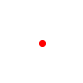

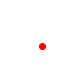

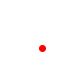

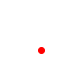

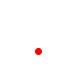

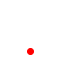

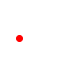

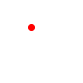

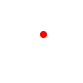

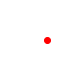

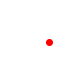

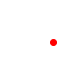

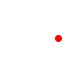

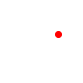

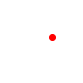

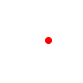

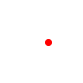

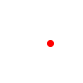

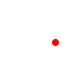

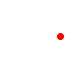

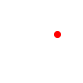

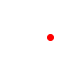

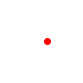

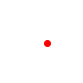

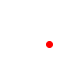

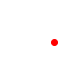

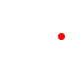

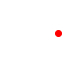

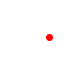

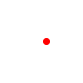

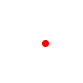

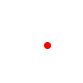

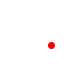

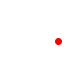

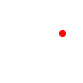

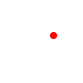

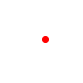

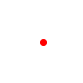

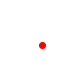

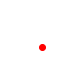

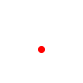

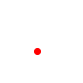

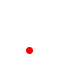

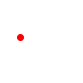

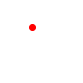

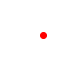

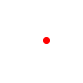

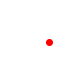

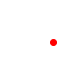

In [18]:
t_max = 6000
t = np.arange(0.0, t_max, 0.1)
states = odeint(f, state0, t)

for i in range(5500,6000):
    fig = plt.figure(figsize=(1.28, 1.28))
    ax = fig.gca(projection="3d")
    ax.plot(states[i:t_max, 0], states[i:t_max, 1], states[i:t_max, 2], '-', linewidth=0.2, c='white')
    #ax.plot(states[0:i-1, 0], states[0:i-1, 1], states[0:i-1, 2], '-', linewidth=0.2)
    ax.plot(states[0:i-1, 0], states[0:i-1, 1], states[0:i-1, 2], '-', linewidth=0.2, c='white')
    ax.plot(states[i, 0], states[i, 1], states[i, 2], 'o', c='red')
    ax.set_axis_off()
    plt.draw()
    plt.show()

### For GIF

In [ ]:
import glob
from PIL import Image

In [45]:
t_max = 3700
time_step = 0.01
frame_size = 128
frames_per_folder = t_max

folder_name = 'lorenz_frames_gif'

t = np.arange(0.0, t_max, time_step)
states = odeint(f, state0, t)

os.mkdir(folder_name)

for i in range(t_max-500, t_max):
    if i%10 == 0:
        fig = plt.figure(figsize=(frame_size/100., frame_size/100))
        ax = fig.gca(projection="3d")
        ax.set_axis_off()
        ax.plot(states[i+1:t_max, 0], states[i+1:t_max, 1], states[i+1:t_max, 2], '-', c="white")
        ax.plot(states[0:i-1, 0], states[0:i-1, 1], states[0:i-1, 2], '-', linewidth=0.2)
        ax.plot(states[i, 0], states[i, 1], states[i, 2], '.', c='red')
        plt.savefig("./%s/%s.jpg" %(folder_name, str(i)), dpi = 100)
        plt.close(fig)

In [46]:
frames = [Image.open(image) for image in glob.glob(f"{'lorenz_frames_gif'}/*.jpg")]
frame_one = frames[0]
frame_one.save("my_gif.gif", format="GIF", append_images=frames, save_all=True, duration=10, loop=0)